# Exercise 1
```In this exercise you will experience with pandas, matplotlib and numpy. This are main tools we are going to use later in course, and which are extremly useful in a variety of tasks. For each question, answer it in cells directly beneath it.```

```You are more than encourged to read relevant parts, mainly from ``` [pandas' API](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)

```~ Ittai Haran```

## DataFrame basics

```A few of the fundamental routines for selecting, sorting, adding and aggregating data in DataFrames```

```import numpy and pandas```

In [274]:
import pandas as pd
import numpy as np
pd.__version__

'0.24.2'

```Consider the following Python dictionary `data` and Python list `labels`:```

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

```Create a DataFrame `df` from this dictionary `data` which has the index `labels`.```

In [250]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame.from_dict(data=data)

df['index']=labels
df.set_index(['index'],inplace=True,drop=True)
print(df)
df.loc['a']

      animal  age  visits priority
index                             
a        cat  2.5       1      yes
b        cat  3.0       3      yes
c      snake  0.5       2       no
d        dog  NaN       3      yes
e        dog  5.0       2       no
f        cat  2.0       3       no
g      snake  4.5       1       no
h        cat  NaN       1      yes
i        dog  7.0       2       no
j        dog  3.0       1       no


animal      cat
age         2.5
visits        1
priority    yes
Name: a, dtype: object

```Display a summary of the basic information about this DataFrame and its data using the decribe and the info functions```

In [251]:
print(df.describe())
print()
print(df.info())

            age     visits
count  8.000000  10.000000
mean   3.437500   1.900000
std    2.007797   0.875595
min    0.500000   1.000000
25%    2.375000   1.000000
50%    3.000000   2.000000
75%    4.625000   2.750000
max    7.000000   3.000000

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
animal      10 non-null object
age         8 non-null float64
visits      10 non-null int64
priority    10 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 720.0+ bytes
None


```Return the first 3 rows of the DataFrame `df`. Do it two times: use head and iloc```

In [252]:
print(df.head(3))
print(df.iloc[0:3,:])

      animal  age  visits priority
index                             
a        cat  2.5       1      yes
b        cat  3.0       3      yes
c      snake  0.5       2       no
      animal  age  visits priority
index                             
a        cat  2.5       1      yes
b        cat  3.0       3      yes
c      snake  0.5       2       no


```Select just the 'animal' and 'age' columns from the DataFrame `df`.```

In [253]:
print(df[['animal','age']])

      animal  age
index            
a        cat  2.5
b        cat  3.0
c      snake  0.5
d        dog  NaN
e        dog  5.0
f        cat  2.0
g      snake  4.5
h        cat  NaN
i        dog  7.0
j        dog  3.0


```Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.```

In [254]:
df.iloc[[3,4,8]][['animal','age']]

,animal,age
index,,
d,dog,NaN
e,dog,5.0
i,dog,7.0


```Select only the rows where the number of visits is greater than 3. Pandas supports two useful APIs:
(df[boolean list/series]) returns the rows for which the value is True
(df[column] > num) returns a boolean series```

In [255]:
df[df['visits']>3]

,animal,age,visits,priority
index,,,,


```Select the rows where the age is missing, i.e. is `NaN`.```

In [256]:
df[df['age'].isnull()]

,animal,age,visits,priority
index,,,,
d,dog,NaN,3,yes
h,cat,NaN,1,yes


```Select the rows where the animal is a cat *and* the age is less than 3. You can use logical operands: &, |, ~```

In [257]:
df[(df['animal']=='cat')&(df['age']<3)]

,animal,age,visits,priority
index,,,,
a,cat,2.5,1,yes
f,cat,2.0,3,no


```Select the rows the age is between 2 and 4 (inclusive).```

In [258]:
df[(df['age']<=4) & (df['age']>=2)]

,animal,age,visits,priority
index,,,,
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


```Change the age in row 'f' to 1.5.```

In [259]:
print (df.loc[['f']])
df.set_value('f','age',1.5)
print (df.loc[['f']])

      animal  age  visits priority
index                             
f        cat  2.0       3       no
      animal  age  visits priority
index                             
f        cat  1.5       3       no


C:\Users\T8624389\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


```Calculate the sum of all visits (the total number of visits). Do it twice: using built in pandas functions and using numpy```

In [260]:
print (df['visits'].sum())
print(np.sum(df['visits']))

19
19


```Calculate the mean age for each different animal in `df`.```

In [261]:
df.groupby(['animal'])['age'].mean()

animal
cat      2.333333
dog      5.000000
snake    2.500000
Name: age, dtype: float64

```Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.```

In [262]:
new = ['xyz']*len(df)
df["new"]=new
print (df)
df.drop("new",1,inplace=True)
print (df)

      animal  age  visits priority  new
index                                  
a        cat  2.5       1      yes  xyz
b        cat  3.0       3      yes  xyz
c      snake  0.5       2       no  xyz
d        dog  NaN       3      yes  xyz
e        dog  5.0       2       no  xyz
f        cat  1.5       3       no  xyz
g      snake  4.5       1       no  xyz
h        cat  NaN       1      yes  xyz
i        dog  7.0       2       no  xyz
j        dog  3.0       1       no  xyz
      animal  age  visits priority
index                             
a        cat  2.5       1      yes
b        cat  3.0       3      yes
c      snake  0.5       2       no
d        dog  NaN       3      yes
e        dog  5.0       2       no
f        cat  1.5       3       no
g      snake  4.5       1       no
h        cat  NaN       1      yes
i        dog  7.0       2       no
j        dog  3.0       1       no


```Count the number of each type of animal in `df`.```

In [263]:
len(df.groupby(['animal']))

3

```Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visits' column in *ascending* order. You can use the sort_values function```

In [264]:
print(df.sort_values(by='age',ascending=False))
print(df.sort_values(by='visits',ascending=True))

      animal  age  visits priority
index                             
i        dog  7.0       2       no
e        dog  5.0       2       no
g      snake  4.5       1       no
b        cat  3.0       3      yes
j        dog  3.0       1       no
a        cat  2.5       1      yes
f        cat  1.5       3       no
c      snake  0.5       2       no
d        dog  NaN       3      yes
h        cat  NaN       1      yes
      animal  age  visits priority
index                             
a        cat  2.5       1      yes
g      snake  4.5       1       no
h        cat  NaN       1      yes
j        dog  3.0       1       no
c      snake  0.5       2       no
e        dog  5.0       2       no
i        dog  7.0       2       no
b        cat  3.0       3      yes
d        dog  NaN       3      yes
f        cat  1.5       3       no


```The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.```

In [265]:
df.priority.replace(['yes', 'no'], [True, False], inplace=True)
print (df)

      animal  age  visits  priority
index                              
a        cat  2.5       1      True
b        cat  3.0       3      True
c      snake  0.5       2     False
d        dog  NaN       3      True
e        dog  5.0       2     False
f        cat  1.5       3     False
g      snake  4.5       1     False
h        cat  NaN       1      True
i        dog  7.0       2     False
j        dog  3.0       1     False


```In the 'animal' column, change the 'snake' entries to 'python'.```

In [266]:
df.animal.replace(['snake'],['python'],inplace=True)
print (df)

       animal  age  visits  priority
index                               
a         cat  2.5       1      True
b         cat  3.0       3      True
c      python  0.5       2     False
d         dog  NaN       3      True
e         dog  5.0       2     False
f         cat  1.5       3     False
g      python  4.5       1     False
h         cat  NaN       1      True
i         dog  7.0       2     False
j         dog  3.0       1     False


```For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (hint: use a pivot table).```

In [273]:
table = pd.pivot_table(df,values='age',index='animal',columns='visits',aggfunc=np.mean)
print (table)

visits    1    2     3
animal                
cat     2.5  NaN  2.25
dog     3.0  6.0   NaN
python  4.5  0.5   NaN


```Now you will be asked to generate your own test data and manipulate it using functions you will have to create.```

```Create a dataframe with 1000 rows and 3 columns. The columns are to be the following:```
```
        - age: an integer, uniformly distributed between 20 to 65
        - skill: a float, normally distributed between 0 and 1, with expected value = 0.5 and standard deviation = 0.3
        - height: a float with 2 digits after the decimal point, between 1.5 to 2.0
```
```you might want to use numpy.random```

In [312]:
age = np.random.randint(20,66,1000)
"""s=age
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 15, density=True)
plt.show()"""

import scipy.stats
lower = 0
upper = 1
mu = 0.5
sigma = 0.3
N = 1000

skill = scipy.stats.truncnorm.rvs((lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=N)
"""s=skill
count, bins, ignored = plt.hist(s, 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
linewidth=2, color='r')
plt.show()"""

height = np.around(np.random.uniform(1.5,2,1000),2)

data = pd.DataFrame.from_dict({'age':age,'skill':skill,'height':height})

```Add the dataframe a new columns, called salary, when:```
        <center>$salary = 1000\cdot((age^2)/1000 + 1.7\cdot skill + 0.4\cdot exp(-(height-1.7)^2)$<center>

In [314]:
data['salary']=1000*((data['age'])**2)/1000+1.7*data['skill']+0.4*np.exp(-(data['height']-1.7)**2)

```Split the dataframe to groups by the age left digit and by the age. for each group compute:```
```
        - the number of rows
        - the mean salary
        - the maximum height     
```

```To do so, read about the groupby and agg functions is the ``` [pandas API](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)

In [343]:
grouped=data.groupby(['age'])
print (grouped.agg({'age':['count'],
                    'salary':'mean',
                    'height':'max'}))
data['left_age_digit']=(data['age']/10).astype(int)
grouped=data.groupby(['left_age_digit'])
print (grouped.agg({'age':['count'],
                    'salary':'mean',
                    'height':'max'}))
data.drop('left_age_digit',1,inplace=True)

      age       salary height
    count         mean    max
age                          
20     23   401.289987   1.98
21     19   442.159186   1.98
22     23   485.145756   1.95
23     23   530.260440   1.97
24     24   577.260635   1.98
25     29   626.336447   2.00
26     20   677.237931   2.00
27     23   730.225439   2.00
28     13   785.204497   1.96
29     22   842.217082   1.99
30     22   901.301923   1.97
31     25   962.363218   1.99
32     25  1025.168237   1.93
33     16  1090.302027   1.91
34     20  1157.229759   1.98
35     20  1226.213533   1.98
36     24  1297.243274   1.98
37     23  1370.366003   1.99
38     21  1445.277075   2.00
39     25  1522.210195   1.98
40     25  1601.409127   1.99
41     19  1682.198188   2.00
42     15  1765.079063   1.99
43     30  1850.295304   1.96
44     19  1937.203588   1.92
45     18  2026.296331   1.97
46     12  2117.341215   1.94
47     25  2210.324359   1.97
48     22  2305.190967   2.00
49     20  2402.202300   1.99
50     20 

```Now split the dataframe to groups by age. For each group compute the mean salary, divided by the sum of heights.```

In [344]:
def f(x):
    d={}
    d['value']=x['salary'].mean()/x['height'].sum()
    return pd.Series(d,index=['value'])
grouped=data.groupby(['age']).apply(f)
print(grouped)

          value
age            
20    10.447539
21    13.406889
22    11.990750
23    13.387035
24    13.711654
25    12.240306
26    19.727292
27    18.416783
28    33.772236
29    22.181119
30    23.163761
31    21.936704
32    23.930164
33    40.247399
34    33.866835
35    34.405542
36    31.161260
37    33.579172
38    40.235999
39    34.230047
40    37.468627
41    50.760356
42    66.306501
43    35.733783
44    57.552097
45    66.218834
46    99.733453
47    52.056626
48    58.433231
49    70.096361
50    69.673054
51    59.475510
52    52.165868
53    85.758433
54    96.406095
55    63.616543
56    87.068177
57    64.295448
58    91.644820
59   116.897005
60    87.052554
61   151.553427
62    81.605959
63    90.601656
64   103.753290
65   137.259294


```Add these lines to your code:```
```python
        import matplotlib.pyplot as plt
        %matplotlib inline
``` 
       
```Now try using the pd.DataFrame.plot function to show your data. Try also using pd.DataFrame.boxplot.```

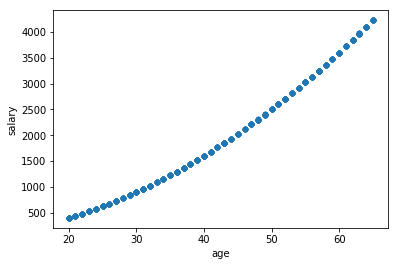

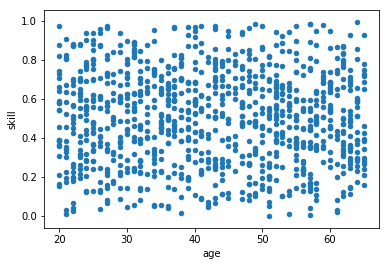

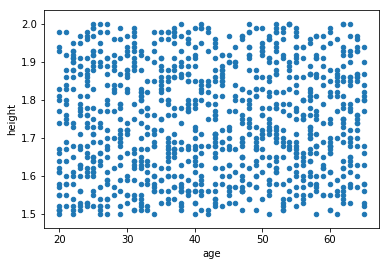

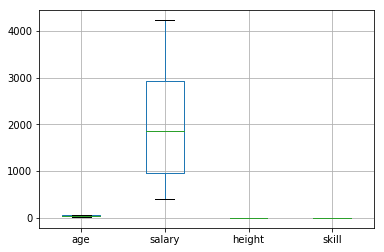

In [349]:
import matplotlib.pyplot as plt
%matplotlib inline
df=data
plt.close('all')

df.plot(x = 'age', y = 'salary', kind="scatter")
df.plot(x = 'age', y = 'skill', kind="scatter")
df.plot(x = 'age', y = 'height', kind="scatter")
plt.show()

boxp = df.boxplot(column=['age','salary','height','skill']

```Save the result as a csv```

In [350]:
df.to_csv('df.csv')

## Working with real-life data

```read the csv file entitled house_prices_numeric.csv consider writing the following line of code:```
```python
pd.options.display.max_columns=50
```

In [467]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns=50

In [468]:
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_numeric.csv')

```In the following questions, print your answer if possible, draw a graph or visualize it in any other means. When drawing a graph, add a title to it. Answer the following questions (try using a single line of code for each):```
```
- What is oldest house in the dataset (YearBuilt)?
- What is the highest price (SalePrice) of houses built in that year?
- What is the mean area (LotArea) of houses?
- What is the 50-percentile of the area (LotArea) of houses?
- What is more common: having a fireplace (Fireplaces) in the house, or not having one?
- What is the mean price (SalePrice) of houses that have swimming pools (PoolArea)?
- How many houses were sold every year (YrSold)? Draw a graph using plt.plot or pandas.plot
- What is the distribution of the overall condition of the houses (OverallCond)? Use plt.hist or pandas.hist
- For every number of fireplaces in a house (Fireplaces), compute the mean price of a house, the mean age of the house (we are in 2019) and the count of distinct FullBath values
- Take only houses with MSSubClass > 60. Split into groups according to whether or not the MSSubClass is a multiple of 20. For each group compute the mean, max, min and standard deviation of OverallQual
```

In [469]:
'''
-) 1872
-) 122000
-) 10516.828082191782
-) 9478.5
-) True (more common - having a fireplace)
-) 288138.5714285714
'''

'\n-) 1872\n-) 122000\n-) 10516.828082191782\n-) 9478.5\n-) True (more common - having a fireplace)\n-) 288138.5714285714\n'

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
1872
122000
10516.828082191782
9478.5
True
288138.5714285714


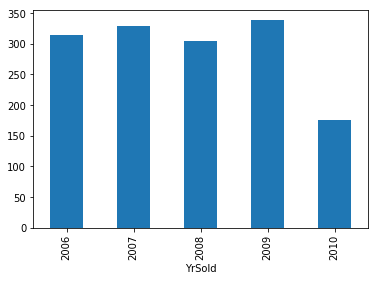

                SalePrice  YearBuilt
                     mean        age
Fireplaces                          
0           141331.482609  54.781159
1           211843.909231  39.150769
2           240588.539130  54.347826
3           252000.000000  38.400000
  OverallQual                  
         mean max min       std
0    6.019444   9   3  1.204522
1    5.972222  10   4  1.383290


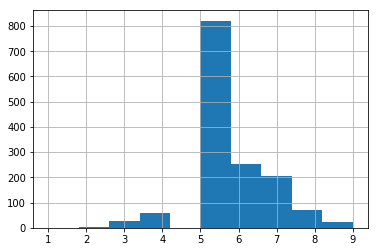

In [470]:
print(list(df.columns.values))
#oldest house
print (df['YearBuilt'].min())
#highet price among oldest houses
print (df[df['YearBuilt']==1872]['SalePrice'].max())
#mean area
print (df['LotArea'].mean())
#percentile 0.5
print (df['LotArea'].quantile(0.5))
#having a fireplace
print (df.groupby('Fireplaces').size()[1:].sum()>df.groupby('Fireplaces').size()[0])
#mean price of houses with a swimmingpool
print (df[df['PoolArea']!=0]['SalePrice'].mean())
# number of houses sold every year
data = df.groupby('YrSold').size()
import matplotlib.pyplot as plt
%matplotlib inline
plt.close('all')
data.plot(kind='bar')
plt.show()
#distribution of condition
pd.Series.hist(df['OverallCond'])
# for every number of fireplaces...
grouped = df.groupby('Fireplaces')

def age(x):
    return 2019-x.mean()

print (grouped.agg({'SalePrice':['mean'],
                    'YearBuilt':age,
                    }))

#MSSubClass>60
data = df[df['MSSubClass'] > 60].groupby(lambda x: df['MSSubClass'].loc[x]%2)
print (data.agg({'OverallQual':['mean','max','min','std']}))



# Feature extraction

```Load the complete version of the houses table, entitled "house_prices_larger.csv"```

In [516]:
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_larger.csv')

```As you recall, the feature extraction process is done in order to let us describe the data in more "meaningful" manner. Add the following features to your dataframe:```
- ```LotArea in squared meters ( it's currently in units of squared feet)```
- ```1stFlrSF + 2ndFlrSF```
- ```GarageArea**0.5```
- ```LotArea / (BedroomAbvGr+1)```
- ```LotArea / (mean LotArea for houses built in that same year + 1e-5) - you might want to use``` [pandas merge function](https://www.google.com/search?q=pandas+merge&oq=pandas+merge&aqs=chrome..69i57l2j69i59l3j69i60.2080j0j9&sourceid=chrome&ie=UTF-8)
- ```Ranking of LotArea (largest house has 1, the second largest has 2 and so on)```
- ```One hot encoding of LotConfig - that is, add feature againts every value possible in LotConfig, which is 1 if the sample's LotConfig is this value and 0 otherwise (consider``` [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html))

```make a list of the names of the features you created.```

In [565]:
print (df.columns.values)
df['LotAreaSquaredMeters']=df['LotArea']*0.09290304
df['1&2FlrSF']=df['1stFlrSF']+df['2ndFlrSF']
df['GarageLength']=df['GarageArea']**0.5
df['LotArea / (BedroomAbvGr+1)']=df['LotArea'] / (df['BedroomAbvGr']+1)
#large = df.merge(df.groupby('YearBuilt')['LotArea'].mean(),on='YearBuilt')
large = pd.merge((df.groupby('YearBuilt').mean()['LotArea'] + 1e-5).reset_index(),df,on='YearBuilt')
df['LotArea / mean'] = large['LotArea_y']/large['LotArea_x']
df['LotAreaRank']=df['LotArea'].rank(method='max')
dummies= pd.get_dummies(df['LotConfig'])
df[pd.get_dummies(df['LotConfig']).columns]=dummies
names=['LotAreaSquaredMeters','1&2FlrSF','GarageLength','LotArea / (BedroomAbvGr+1)','LotArea / mean','LotAreaRank','Corner',
 'CulDSac', 'FR2', 'FR3', 'Inside']

['Id' 'MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual' 'OverallCond'
 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF'
 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath'
 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt'
 'GarageCars' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold' 'YrSold'
 'SalePrice' 'LotConfig' 'LotAreaSquaredMeters' '1&2FlrSF' 'GarageLength'
 'LotArea / (BedroomAbvGr+1)' 'LotArea / mean' 'LotAreaRank' 'Corner'
 'CulDSac' 'FR2' 'FR3' 'Inside']


## Simple linear model

```Next, we will train a simple linear model, as seen in class, to predict SalePrice. Use the features you computed. Create train and test segments, normalize the data (both the features and the target) and use a linear model. Make sure you don't somehow use the test data when training your model (or when normalizing your data).```

In [518]:
from sklearn.linear_model import LinearRegrqession
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

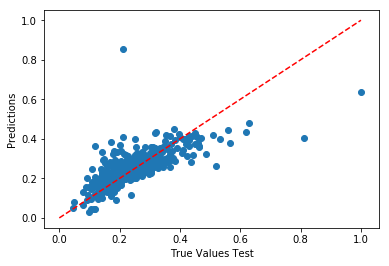

Test errstdor 0.004950412904601305


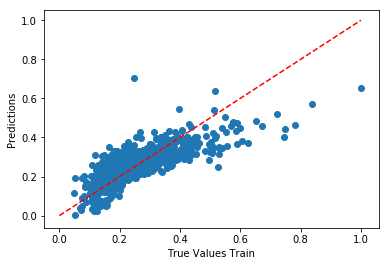

Train error 0.004181474981129047


In [583]:
X_train, X_test, y_train, y_test= train_test_split(df[names], df['SalePrice'], test_size=0.3)
y_train /= max(y_train)
y_test /= max(y_test)

reg = LinearRegression(normalize=True)

reg.fit(X_train,y_train)
predictions = reg.predict(X_test)

plt.scatter(y_test, predictions)
plt.xlabel("True Values Test")
plt.ylabel("Predictions")
plt.plot([0,1],[0,1],'r--')

plt.show()
print ("Test errstdor",mean_squared_error(y_test,predictions))

predictions = reg.predict(X_train)

plt.scatter(y_train,predictions)
plt.xlabel("True Values Train")
plt.ylabel("Predictions")
plt.plot([0,1],[0,1],'r--')

plt.show()
print ("Train error",mean_squared_error(y_train,predictions))


```Next, we will add extra features: for any feature you computed earlier, add feature**2 and feature**3. Now use Ridge regression (regularized linear regression, as we discussed in class). Draw graphs of the loss computed on the train and on the validation as a function of the regularization parameter, for``` 1$\leq\alpha\leq$30. ```What regularization would it be best to take?```

In [580]:
from sklearn.linear_model import Ridge
#df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_special.csv')

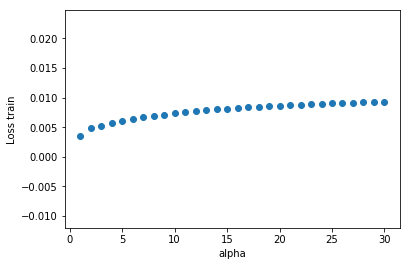

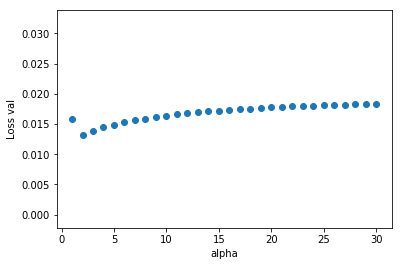

In [588]:
data = df[names]
new_names=names[:]
for name in names:
    df["{0}^2".format(name)]=df[name]**2
    df["{0}^3".format(name)]=df[name]**3
    new_names.append("{0}^2".format(name))
    new_names.append("{0}^3".format(name))
    
X_train, X_test, y_train, y_test = train_test_split(
    df[new_names], df['SalePrice'], test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=1)
y_train /= max(y_train)
y_val /= max(y_val)
y_test /= max(y_test)

train_std=[0]*30
val_std=[0]*30
for i in range(30):
    rr=Ridge(alpha=i,normalize=True)
    rr.fit(X_train,y_train)
    
    train_std[i]=mean_squared_error(y_train,rr.predict(X_train))
    val_std[i]=mean_squared_error(y_val,rr.predict(X_val))
    
plt.scatter(list(range(1,31)),train_std)
plt.xlabel("alpha")
plt.ylabel("Loss train")
plt.show()
    
    
plt.scatter(list(range(1,31)),val_std)
plt.xlabel("alpha")
plt.ylabel("Loss val")
plt.show() 
    
    




In [591]:
"""From the graphs above it might be seen that the best regularization to take is alpha=2 (gives almost lowest loss both on test and on train)"""

'From the graphs above it might be seen that the best regularization to take is alpha=2 (gives almost lowest loss both on test and on train)'